In [1]:
import matplotlib
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm
from sklearn.decomposition import PCA
from sklearn.datasets import fetch_olivetti_faces
%matplotlib inline
matplotlib.rcParams['axes.unicode_minus'] = False

# 한글 폰트 확인
print([(f.name, f.fname) for f in fm.fontManager.ttflist if 'Nanum' in f.name])

# mac에서 matplotlib 한글을 사용하기 위해서는 번거롭지만 font 파일을 직접 잡아줘야함
path = '/Library/Fonts/NanumBarunGothic.otf'
fontprop = fm.FontProperties(fname=path, size=18)
fontprop_subtitle = fm.FontProperties(fname=path, size=12)

[('NanumBarunGothicOTF', '/Library/Fonts/NanumBarunGothic.otf'), ('NanumGothic', '/Library/Fonts/NanumGothic.ttf'), ('NanumGothic', '/Library/Fonts/NanumGothicBold.ttf'), ('NanumGothic', '/Library/Fonts/NanumGothicExtraBold.ttf')]


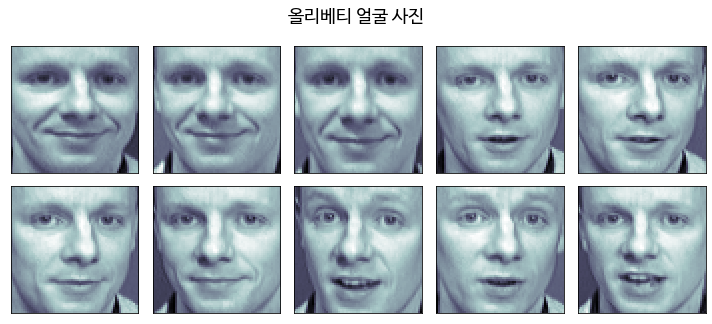

In [2]:
# 다운받은 얼굴 파일을 확인한다

faces_all = fetch_olivetti_faces()
K = 20  # 20번 인물의 사진만 선택
faces = faces_all.images[faces_all.target == K]

N = 2
M = 5
fig = plt.figure(figsize=(10, 5))
plt.subplots_adjust(top=1, bottom=0, hspace=0, wspace=0.05)
for i in range(N):
    for j in range(M):
        k = i * M + j
        ax = fig.add_subplot(N, M, k+1)
        ax.imshow(faces[k], cmap=plt.cm.bone)
        ax.grid(False)
        ax.xaxis.set_ticks([])
        ax.yaxis.set_ticks([])
plt.suptitle("올리베티 얼굴 사진", fontproperties=fontprop)
plt.tight_layout()
plt.show()

In [3]:
# PCA 분해를 실시함
# component는 2개만 이용

pca = PCA(n_components=2)
X = faces_all.data[faces_all.target == K]
W = pca.fit_transform(X)
X_inv = pca.inverse_transform(W)

print(f"두 차원의 설명 정도: {pca.explained_variance_ratio_}")

두 차원의 설명 정도: [0.36928636 0.25333136]


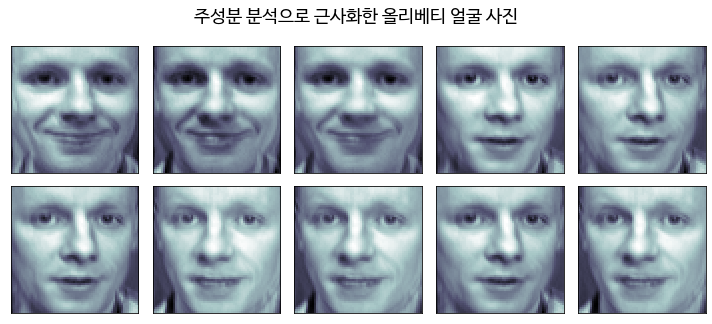

In [4]:
# 얼굴 근사

N = 2
M = 5
fig = plt.figure(figsize=(10, 5))
plt.subplots_adjust(top=1, bottom=0, hspace=0, wspace=0.05)
for i in range(N):
    for j in range(M):
        k = i * M + j
        ax = fig.add_subplot(N, M, k+1)
        ax.imshow(X_inv[k].reshape(64, 64), cmap=plt.cm.bone)
        ax.grid(False)
        ax.xaxis.set_ticks([])
        ax.yaxis.set_ticks([])
plt.suptitle("주성분 분석으로 근사화한 올리베티 얼굴 사진", fontproperties=fontprop)
plt.tight_layout()
plt.show()

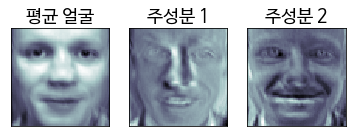

In [5]:
face_mean = pca.mean_.reshape(64, 64)
face_p1 = pca.components_[0].reshape(64, 64)
face_p2 = pca.components_[1].reshape(64, 64)

plt.subplot(131)
plt.imshow(face_mean, cmap=plt.cm.bone)
plt.grid(False)
plt.xticks([])
plt.yticks([])
plt.title("평균 얼굴", fontproperties=fontprop)
plt.subplot(132)
plt.imshow(face_p1, cmap=plt.cm.bone)
plt.grid(False)
plt.xticks([])
plt.yticks([])
plt.title("주성분 1", fontproperties=fontprop)
plt.subplot(133)
plt.imshow(face_p2, cmap=plt.cm.bone)
plt.grid(False)
plt.xticks([])
plt.yticks([])
plt.title("주성분 2", fontproperties=fontprop)
plt.show()

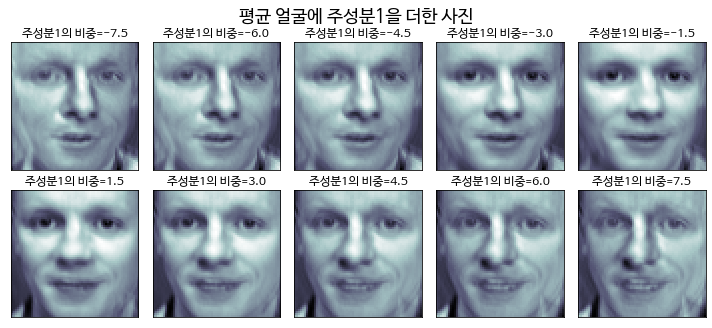

In [6]:
# 평균 얼굴에 주성분 1의 조합으로 표현

N = 2
M = 5
fig = plt.figure(figsize=(10, 5))
plt.subplots_adjust(top=1, bottom=0, hspace=0, wspace=0.05)
for i in range(N):
    for j in range(M):
        k = i * M + j
        ax = fig.add_subplot(N, M, k+1)
        w = 1.5 * (k - 5) if k < 5 else 1.5 * (k - 4)
        ax.imshow(face_mean + w * face_p1, cmap=plt.cm.bone)
        ax.grid(False)
        ax.xaxis.set_ticks([])
        ax.yaxis.set_ticks([])
        plt.title("주성분1의 비중={}".format(w), fontproperties=fontprop_subtitle)
plt.suptitle("평균 얼굴에 주성분1을 더한 사진", fontproperties=fontprop)
plt.tight_layout()
plt.show()

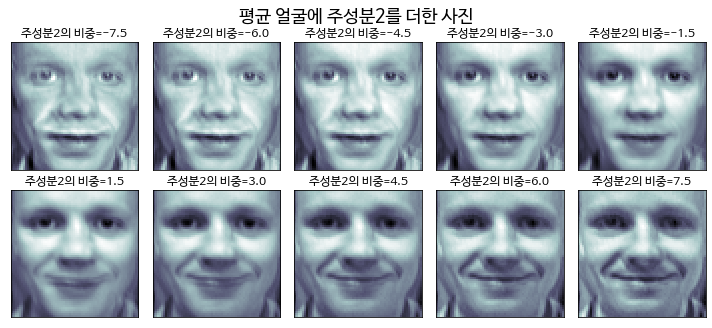

In [7]:
# 평균 얼굴에 주성분 2의 조합으로 표현

N = 2
M = 5
fig = plt.figure(figsize=(10, 5))
plt.subplots_adjust(top=1, bottom=0, hspace=0, wspace=0.05)
for i in range(N):
    for j in range(M):
        k = i * M + j
        ax = fig.add_subplot(N, M, k+1)
        w = 1.5 * (k - 5) if k < 5 else 1.5 * (k - 4)
        ax.imshow(face_mean + w * face_p2, cmap=plt.cm.bone)
        ax.grid(False)
        ax.xaxis.set_ticks([])
        ax.yaxis.set_ticks([])
        plt.title("주성분2의 비중={:.1f}".format(w), fontproperties=fontprop_subtitle)
plt.suptitle("평균 얼굴에 주성분2를 더한 사진", fontproperties=fontprop)
plt.tight_layout()
plt.show()